# Para a P1 deve ser entregue:


# o base de dados (em Excel, Stata ou assemelhado);

o do file de Stata ou similar; e,
o PDF da apresentação com +/- 20 slides.

Na apresentação, de cerca de 30 minutos, os alunos devem ter:

uma introdução ao tema analisado, explicando porque se interessou pelo assunto
e qual a relevância disso;

uma pequena revisão de Google Scholar sobre o tema;

# explicação de como a base de dados foi montada;
 
# análise descritiva dos dados;

# ideia de modelo econométrico a ser aplicado.

In [4]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [5]:
#carregar dados exportações
dataexpo=pd.read_excel("expo3.xlsx")

# Visualizar os nomes das colunas separadas
display(dataexpo)



,Ano,UF do Produto,Código CGCE Nível 1,Descrição CGCE Nível 1,Valor FOB (US$)
0,2021,São Paulo,1,BENS DE CAPITAL (BK),7824989182
1,2021,Rio Grande do Sul,1,BENS DE CAPITAL (BK),1210896309
2,2021,Paraná,1,BENS DE CAPITAL (BK),1034504712
3,2021,Santa Catarina,1,BENS DE CAPITAL (BK),962705795
4,2021,Minas Gerais,1,BENS DE CAPITAL (BK),629451937
...,...,...,...,...,...
254,2012,Paraíba,1,BENS DE CAPITAL (BK),117336
255,2012,Roraima,1,BENS DE CAPITAL (BK),62169
256,2012,Acre,1,BENS DE CAPITAL (BK),25939
257,2012,Maranhão,1,BENS DE CAPITAL (BK),3401


In [6]:
colunas_para_manter=['Ano','UF do Produto','Valor FOB (US$)']
dataexpo=dataexpo[colunas_para_manter]
display(dataexpo)

,Ano,UF do Produto,Valor FOB (US$)
0,2021,São Paulo,7824989182
1,2021,Rio Grande do Sul,1210896309
2,2021,Paraná,1034504712
3,2021,Santa Catarina,962705795
4,2021,Minas Gerais,629451937
...,...,...,...
254,2012,Paraíba,117336
255,2012,Roraima,62169
256,2012,Acre,25939
257,2012,Maranhão,3401


In [7]:
#carregar dados IDHM
idhm=pd.read_excel("IDHMajustado2012_2021.xlsx")

#limpar colunas em branco
colunas_para_manter = ['UF', 'Range', 'Ano']
idhm = idhm[colunas_para_manter]

display(idhm)

,UF,Range,Ano
0,Acre,1,2012
1,Alagoas,1,2012
2,Amapá,1,2012
3,Amazonas,1,2012
4,Bahia,1,2012
...,...,...,...
265,Roraima,1,2021
266,Santa Catarina,2,2021
267,São Paulo,2,2021
268,Sergipe,1,2021


In [8]:
# Combinar as DataFrames com base nas colunas em comum
merged_data = pd.merge(dataexpo, idhm, left_on=['UF do Produto','Ano'], right_on=['UF','Ano'])

display(merged_data)

,Ano,UF do Produto,Valor FOB (US$),UF,Range
0,2021,São Paulo,7824989182,São Paulo,2
1,2021,Rio Grande do Sul,1210896309,Rio Grande do Sul,2
2,2021,Paraná,1034504712,Paraná,2
3,2021,Santa Catarina,962705795,Santa Catarina,2
4,2021,Minas Gerais,629451937,Minas Gerais,2
...,...,...,...,...,...
254,2012,Paraíba,117336,Paraíba,1
255,2012,Roraima,62169,Roraima,2
256,2012,Acre,25939,Acre,1
257,2012,Maranhão,3401,Maranhão,1


In [9]:
resumo_estatistico = merged_data.describe()
display(resumo_estatistico)

,Ano,Valor FOB (US$),Range
count,259.000000,2.590000e+02,259.000000
mean,2016.571429,5.306295e+08,1.532819
std,2.885025,1.779754e+09,0.507582
min,2012.000000,6.600000e+01,1.000000
25%,2014.000000,4.349680e+05,1.000000
50%,2017.000000,8.231152e+06,2.000000
75%,2019.000000,2.182145e+08,2.000000
max,2021.000000,1.153041e+10,3.000000


In [10]:
# Definir as variáveis independentes (features) e a variável dependente (target)
X = merged_data[['Valor FOB (US$)', 'Ano']]
y = merged_data['Range']

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar o modelo de regressão logística
logreg = LogisticRegression()

# Treinar o modelo usando os dados de treinamento
logreg.fit(X_train, y_train)

# Fazer previsões usando os dados de teste
y_pred = logreg.predict(X_test)

# Avaliar o desempenho do modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        25
           2       0.52      1.00      0.68        27

    accuracy                           0.52        52
   macro avg       0.26      0.50      0.34        52
weighted avg       0.27      0.52      0.35        52



C:\Users\nunes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nunes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nunes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\nunes\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


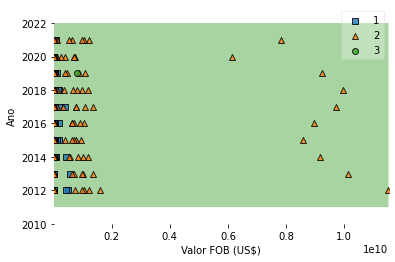

In [11]:
import sys
!{sys.executable} -m pip install mlxtend
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Definir as variáveis independentes (features) e a variável dependente (target)
X = merged_data[['Valor FOB (US$)', 'Ano']].values
y = merged_data['Range'].values

# Instanciar o modelo de regressão logística
logreg = LogisticRegression()

# Treinar o modelo
logreg.fit(X, y)

# Plotar a regressão logística
plot_decision_regions(X, y, clf=logreg)

# Definir os limites dos eixos X e Y
plt.xlim(X[:, 0].min() - 2.0, X[:, 0].max() + 2.0)
plt.ylim(X[:, 1].min() - 2.0, X[:, 1].max() + 2.0)

# Adicionar rótulos aos eixos X e Y
plt.xlabel('Valor FOB (US$)')
plt.ylabel('Ano')

# Mostrar o gráfico
plt.show(logreg)

C:\Users\nunes\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


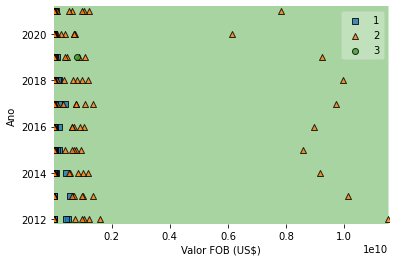

In [12]:
#testando a mesma plotagem acima, mas com o eixo de Valor FOB mais comprimido, 
#para tentar deixar as observações mais espaçadas. Como se pode ver, não deu muito certo, porque mesmo desconsiderando
#as observações dos outliars (SP,SC,PR,RS), os demais estados exportam valores relativamente muito próximos, e quase sempre
#dentro do mesmo Range de IDH

import sys
!{sys.executable} -m pip install mlxtend
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Definir as variáveis independentes (features) e a variável dependente (target)
X = merged_data[['Valor FOB (US$)', 'Ano']].values
y = merged_data['Range'].values

# Instanciar o modelo de regressão logística
logreg = LogisticRegression()

# Treinar o modelo
logreg.fit(X, y)

# Plotar a regressão logística
plot_decision_regions(X, y, clf=logreg)

# Definir os limites dos eixos X e Y
plt.xlim(X[:, 0].min() - 0.0001, X[:, 0].max() + 0.0001)
plt.ylim(X[:, 1].min() - 0.2, X[:, 1].max() + 0.2)

# Adicionar rótulos aos eixos X e Y
plt.xlabel('Valor FOB (US$)')
plt.ylabel('Ano')

# Mostrar o gráfico
plt.show(logreg)

In [13]:
# Teste modelo variável dependente IDHM(Range) e variáveis independentes Exportações e Ano
y = merged_data['Range']
X = merged_data[['Valor FOB (US$)','Ano', ]]

# Adicionar uma constante à matriz de variáveis independentes
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Imprimir os resultados da regressão
display(modelo.summary())


C:\Users\nunes\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Range   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     10.56
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           3.94e-05
Time:                        10:26:51   Log-Likelihood:                -181.12
No. Observations:                 259   AIC:                             368.2
Df Residuals:                     256   BIC:                             378.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -30.6622     21.331     -1.437      0.152     -72.669      11.345
Valor FOB (US$)  7.542e-11   1.71e-11      4.398      0.000    4.17e-11    1.09e-10
Ano                 0.0159      0.011      1.507      0.133      -0.005       0.037
==============================================================================
Omnibus:                     1683.550   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.295
Skew:                           0.073   Prob(JB):                     9.71e-08
Kurtosis:                       1.276   Cond. No.                     1.30e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Checar a previsão do modelo
modelo.predict()

array([2.15357696, 1.65473974, 1.64143622, 1.63602112, 1.610887  ,
       1.6044385 , 1.57164147, 1.57032118, 1.56645337, 1.56595445,
       1.56429455, 1.56424082, 1.56393193, 1.56369513, 1.56356551,
       1.56353191, 1.56348409, 1.56348104, 1.56347911, 1.563478  ,
       1.56347201, 1.56345443, 1.56344006, 1.56343094, 1.56342995,
       1.56341685, 1.56341657, 2.01188373, 1.60369392, 1.60120134,
       1.60099258, 1.57600816, 1.56581067, 1.5561185 , 1.55471445,
       1.5503935 , 1.5502702 , 1.54913412, 1.54842253, 1.54805963,
       1.54803262, 1.54782011, 1.54772217, 1.54765848, 1.54756109,
       1.54754106, 1.54753008, 1.54750549, 1.54750517, 1.54749697,
       1.54749551, 1.54747713, 1.54747181, 2.22781946, 1.61206699,
       1.59782215, 1.59110637, 1.56677907, 1.56132207, 1.54064904,
       1.53835325, 1.53434996, 1.53398448, 1.53362035, 1.53351511,
       1.53231491, 1.5322678 , 1.53193934, 1.53174051, 1.531648  ,
       1.5316133 , 1.53159188, 1.53157158, 1.53155214, 1.53155

Text(0, 0.5, 'Range')

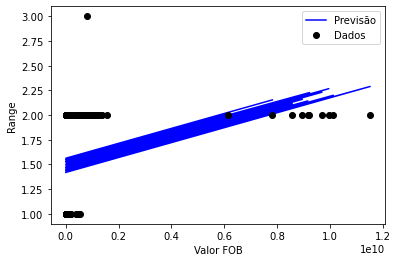

In [15]:
plt.plot(merged_data['Valor FOB (US$)'],modelo.predict(),  'b-', label="Previsão")
plt.plot(merged_data['Valor FOB (US$)'], merged_data['Range'], 'ko', label='Dados')
plt.legend()
plt.xlabel('Valor FOB')
plt.ylabel('Range')


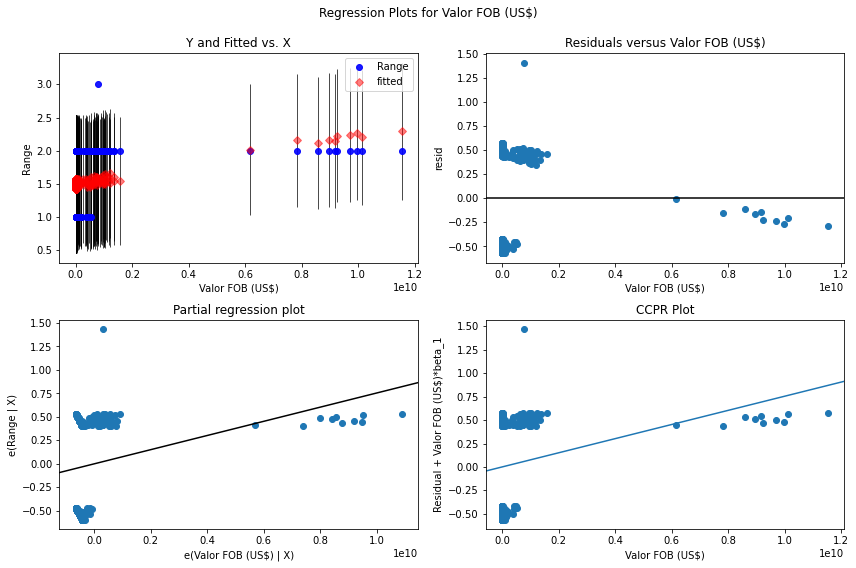

In [16]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(modelo, 'Valor FOB (US$)', fig=fig)

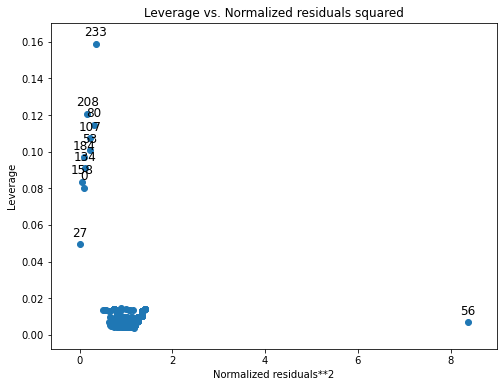

In [17]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(modelo, ax=ax)

In [18]:
import statsmodels.stats.api as sms

In [21]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(modelo.resid, modelo.model.exog)
display(name, test)

['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

(25.969104822530344,
 2.2955171290664583e-06,
 14.26439792351304,
 1.3383159230143979e-06)

In [22]:
np.linalg.cond(modelo.model.exog)

1299448641222.4238